In [50]:
import pandas as pd
import tools.config as config
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import tools.config as config
sns.set(style="darkgrid")

input_files = config.INPUT_FILES
path_name_0 = input_files[2]
path_name_1 = input_files[1]
path_name_2 = input_files[0]

excel_path = f"{config.TASK_DIR}/carbon_price/excel"

In [51]:
def plot_data(df0, df1, df2, path_name_0, path_name_1, path_name_2):
    # 提取所有要画的列（排除 Year）
    y_columns = [col for col in df0.columns if col != "Year"]
    
    # 设置画布大小和子图布局
    n_cols = 4
    n_rows = (len(y_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    # 提前定义所有图例元素
    line_styles = [("o", path_name_0, df0), ("s", path_name_1, df1), ("^", path_name_2, df2)]
    handles = []

    for i, col in enumerate(y_columns):
        ax = axes[i]
        for marker, label, df in line_styles:
            p = sns.lineplot(x="Year", y=col, data=df, ax=ax, marker=marker, label=label)
            if i == 0:  # 只从第一个子图中收集图例
                handles.append(p.lines[-1])
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel('')
        ax.legend_.remove()  # 移除局部图例

    # 删除多余子图
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 添加统一图例到下方
    fig.legend(handles=handles, labels=[h.get_label() for h in handles],
               loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.01))

    plt.tight_layout(rect=[0, 0.01, 1, 1])  # 为底部图例留出空间
    plt.show()

In [52]:
df0 = pd.read_excel(os.path.join(excel_path, f"01_origin_{path_name_0}.xlsx"))
df1 = pd.read_excel(os.path.join(excel_path, f"01_origin_{path_name_1}.xlsx"))
df2 = pd.read_excel(os.path.join(excel_path, f"01_origin_{path_name_2}.xlsx"))

In [53]:
df3 = pd.read_excel(os.path.join(excel_path, f"02_process_{path_name_0}.xlsx"), usecols=range(5))
df4 = pd.read_excel(os.path.join(excel_path, f"02_process_{path_name_1}.xlsx"), usecols=range(5))
df5 = pd.read_excel(os.path.join(excel_path, f"02_process_{path_name_2}.xlsx"), usecols=range(5))
df0 = df0.merge(df3, on="Year", how="left")
df0[df0.columns[10:17]] = None  # 或 np.nan
df1[df1.columns[14:17]] = None  # 或 np.nan
df1 = df1.merge(df4, on="Year", how="left")
df2 = df2.merge(df5, on="Year", how="left")

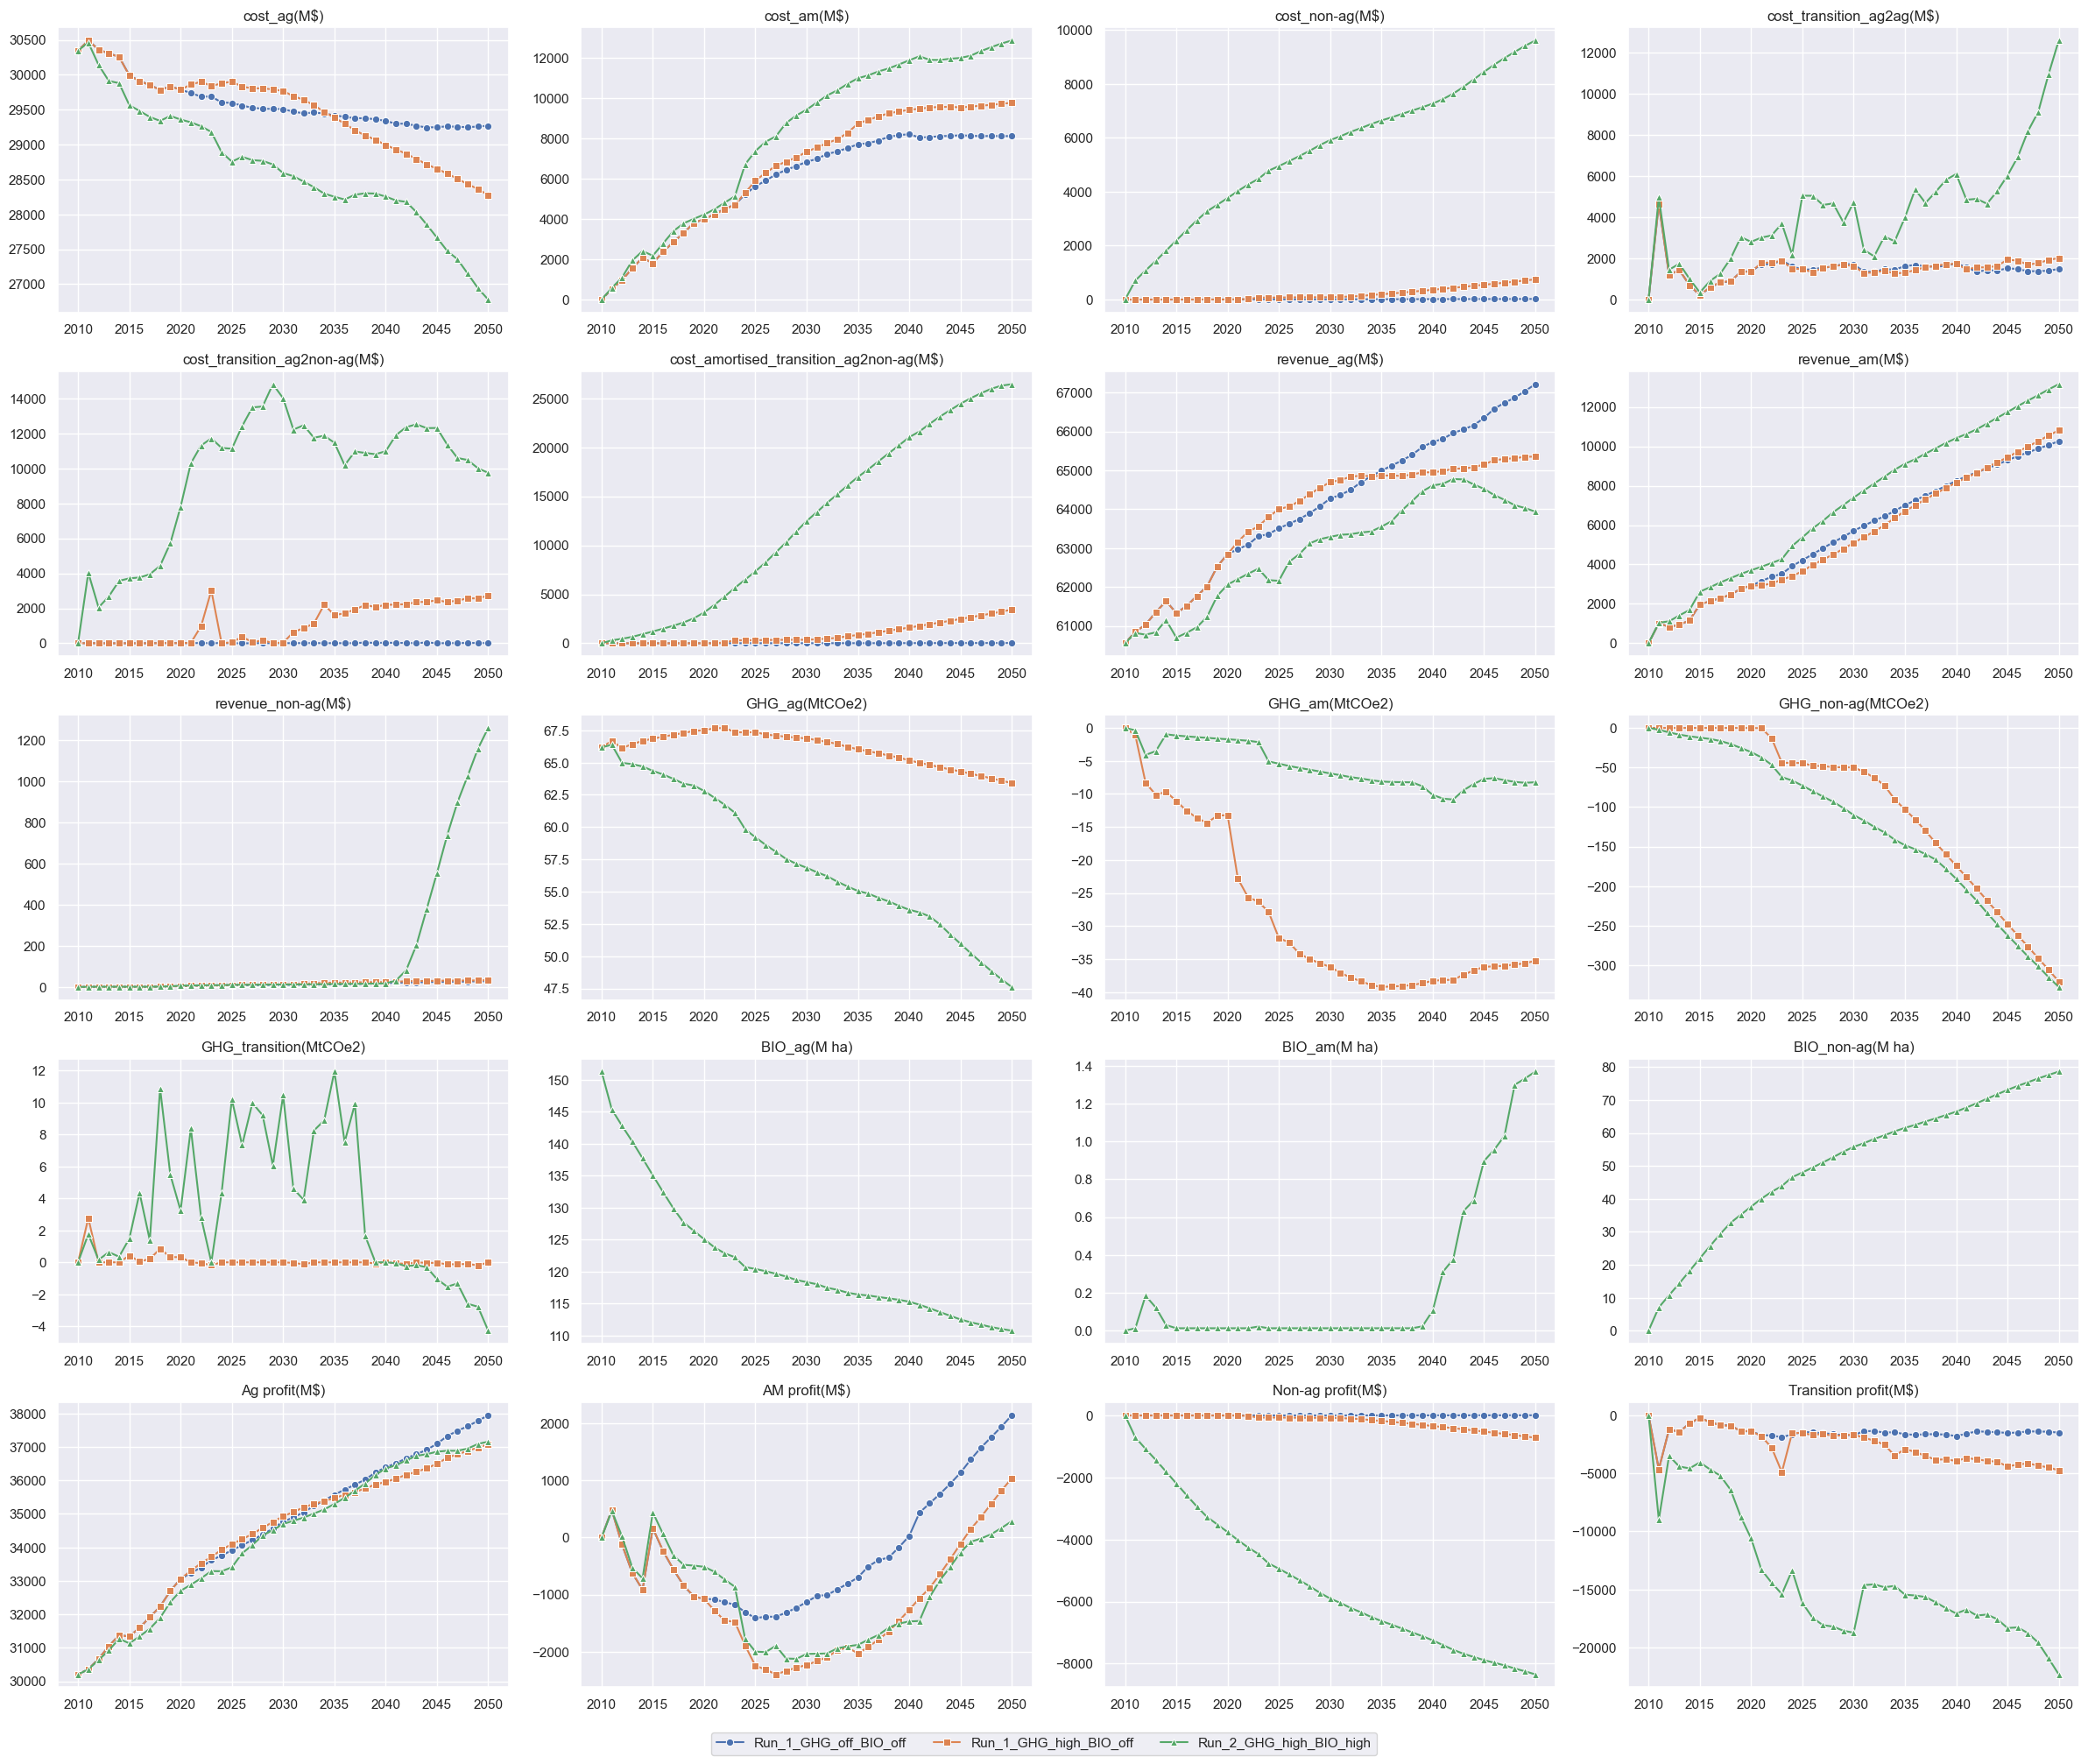

In [54]:
plot_data(df0, df1, df2, path_name_0, path_name_1, path_name_2)

In [55]:
df_ghg = pd.read_excel(os.path.join(excel_path, f"02_process_{path_name_1}.xlsx"), usecols=[0,9],index_col=0)
df_bio = pd.read_excel(os.path.join(excel_path, f"02_process_{path_name_2}.xlsx"), usecols=[0,13],index_col=0)

In [56]:
df_ghg_cost = pd.read_excel(os.path.join(excel_path, f"03_cost.xlsx"), usecols=[0,1,2,3,4],index_col=0)
df_bio_cost = pd.read_excel(os.path.join(excel_path, f"03_cost.xlsx"), usecols=[0,6,7,8,9],index_col=0)
df_ghg_price = df_ghg_cost.div(df_ghg.iloc[:, 0], axis=0)
df_bio_price = df_bio_cost.div(df_bio.iloc[:, 0], axis=0)

In [57]:
df_bio_cost

,BIO_ag_cost,BIO_am_cost,BIO_non-ag_cost,BIO_transition_cost
Year,,,,
2010,0.000000,0.000000,0.000000,0.000000
2011,4.945418,17.598800,17.598800,4338.580875
2012,35.995274,-142.152480,-142.152480,2292.270243
2013,125.859607,-90.389752,-90.389752,2979.363702
2014,107.173995,-197.528848,-197.528848,3876.617450
2015,203.924260,-276.351744,-276.351744,3844.150047
2016,259.182396,-295.096384,-295.096384,4056.625635
2017,343.876013,-242.690432,-242.690432,4356.662923
2018,335.644088,-360.164416,-360.164416,5512.093564


In [58]:
df_ghg_price.columns = config.COLUMN_NAME
df_bio_price.columns = config.COLUMN_NAME
df_ghg_cost.columns = config.COLUMN_NAME
df_bio_cost.columns = config.COLUMN_NAME
df_ghg_cost

,Ag,AM,Non-ag,Transition
Year,,,,
2010,0.000000,0.000000,0.000000,0.000000
2011,-0.001595,0.001565,0.001565,0.045768
2012,-0.073515,0.121499,0.121499,-0.088883
2013,1.083177,-1.800269,-1.800269,6.763371
2014,1.798870,-2.934831,-2.934831,0.460152
2015,1.786393,-3.003689,-3.003689,0.654330
2016,1.982598,-3.767890,-3.767890,25.378588
2017,1.763585,-3.070411,-3.070411,7.415528
2018,1.997110,-3.700772,-3.700772,14.197812


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def plot_multiple_stacked_area(dfs, titles, start_year=2025):
    n = len(dfs)
    n_cols = 2
    n_rows = (n + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5 * n_rows), sharey=False)
    axes = axes.flatten()

    # 固定颜色映射
    custom_colors = ['#DD847E', '#DFDD89', '#A7D398', '#74A3D4','#E58579']
    all_columns = list(dfs[0].columns)
    color_dict = {col: custom_colors[i] for i, col in enumerate(all_columns)}

    legend_handles = None

    for i, (df, title) in enumerate(zip(dfs, titles)):
        if start_year is not None:
            df = df.loc[df.index >= start_year].copy()
        df = df.sort_index()
        total = df.sum(axis=1)

        df_pos = df.clip(lower=0)
        df_neg = df.clip(upper=0)

        ax = axes[i]

        # Stack 正数
        pos_arrays = [df_pos[col].values for col in all_columns]
        pos_colors = [color_dict[col] for col in all_columns]
        ax.stackplot(df.index, pos_arrays, colors=pos_colors, alpha=0.7)

        # Stack 负数
        neg_arrays = [df_neg[col].values for col in all_columns]
        ax.stackplot(df.index, neg_arrays, colors=pos_colors, alpha=0.7)  # 使用相同颜色

        # 总和线
        ax.plot(df.index, total, color='black', linestyle='-', marker='o', linewidth=2)

        ax.set_title(title)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.axhline(0, color='gray', linewidth=0.8)

        if legend_handles is None:
            legend_handles = [Patch(facecolor=color_dict[col], label=col) for col in all_columns]
            legend_handles.append(Line2D([], [], color='black', linestyle='-', marker='o', label='Total'))

    # 删除多余子图
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 添加统一图例
    fig.legend(handles=legend_handles,
               loc='lower center',
               ncol=len(legend_handles),
               bbox_to_anchor=(0.5, -0.02),
               fontsize='small')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.08)
    plt.show()

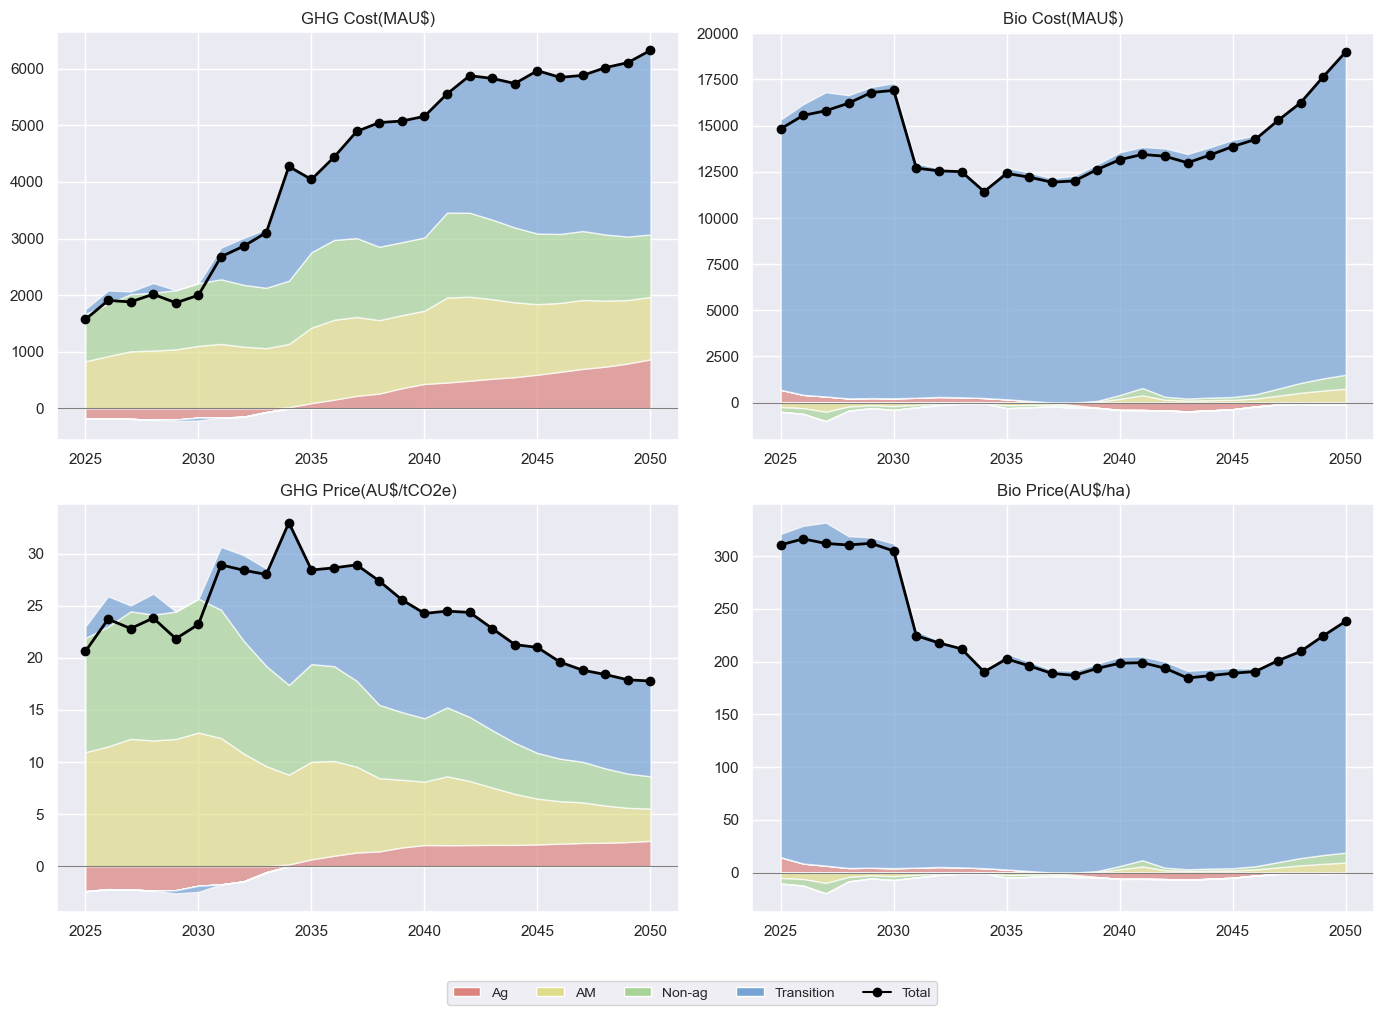

In [60]:
plot_multiple_stacked_area([df_ghg_cost,df_bio_cost,df_ghg_price, df_bio_price],["GHG Cost(MAU$)", "Bio Cost(MAU$)","GHG Price(AU$/tCO2e)", "Bio Price(AU$/ha)"], start_year=2025)

In [61]:
df = pd.read_excel(os.path.join(excel_path, f"04_price.xlsx"), index_col=0)
df = df.loc[df.index >= config.START_YEAR].copy()

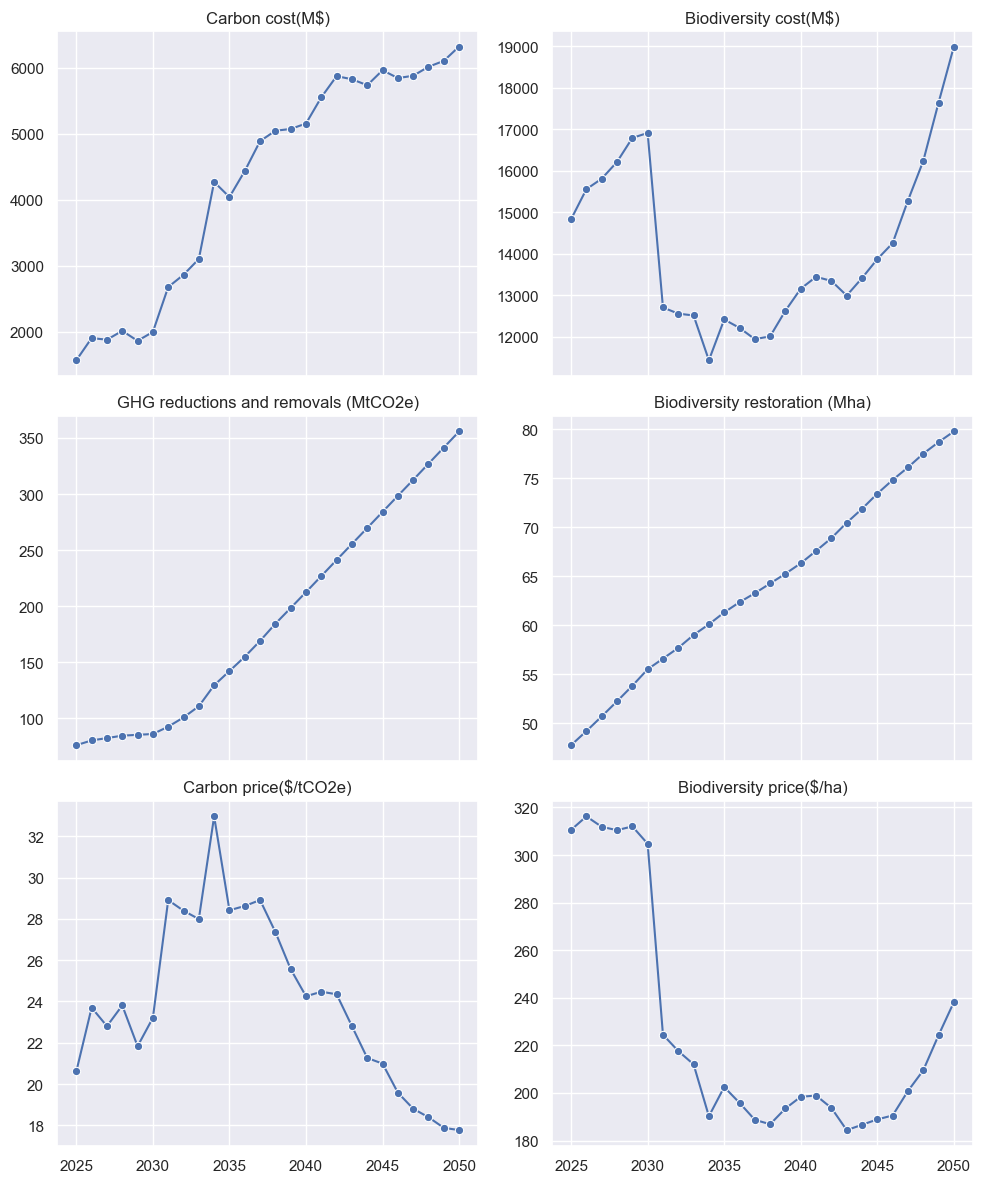

In [62]:
# 图像列数
n_cols = 2
n_rows = math.ceil(len(df.columns) / n_cols)

# 创建画布（不共享 y 轴）
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=True, sharey=False)

# 如果只有一行，axes 是 1D 数组；否则是 2D
axes = axes.flatten() if n_rows > 1 else axes

# 画图
for i, col in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[col], marker='o', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 清除多余的子图（如果列数不是n_cols的倍数）
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()